In [1]:
## Analysis of Jeopardy show data (216,930 questions json data) 
## taken from http://skeeto.s3.amazonaws.com/share/JEOPARDY_QUESTIONS1.json.gz
## inspired by https://www.reddit.com/r/datasets/comments/1uyd0t/200000_jeopardy_questions_in_a_json_file
## Uses json data with Pandas

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import json
from pandas.io.json import json_normalize

# Import the stats librayr from numpy
from scipy import stats, integrate

# These are the plotting modules adn libraries we'll use:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
#new_style = {'grid': True}
sns.set_style('whitegrid')

# Command so that plots appear in the iPython Notebook
%matplotlib inline

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days


In [4]:
df= pd.read_json('JEOPARDY_QUESTIONS.json')

In [5]:
df.head(5)

,air_date,answer,category,question,round,show_number,value
0,2004-12-31,Copernicus,HISTORY,"'For the last 8 years of his life, Galileo was...",Jeopardy!,4680,$200
1,2004-12-31,Jim Thorpe,ESPN's TOP 10 ALL-TIME ATHLETES,'No. 2: 1912 Olympian; football star at Carlis...,Jeopardy!,4680,$200
2,2004-12-31,Arizona,EVERYBODY TALKS ABOUT IT...,'The city of Yuma in this state has a record a...,Jeopardy!,4680,$200
3,2004-12-31,McDonald\'s,THE COMPANY LINE,"'In 1963, live on ""The Art Linkletter Show"", t...",Jeopardy!,4680,$200
4,2004-12-31,John Adams,EPITAPHS & TRIBUTES,"'Signer of the Dec. of Indep., framer of the C...",Jeopardy!,4680,$200


In [6]:
df.shape

(216930, 7)

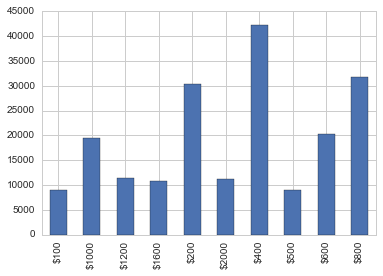

In [7]:
# Most popular values in jeopardy
df.value.value_counts().head(10).sort_index().plot(kind='bar')

In [8]:
# Number of times Tiebreaker roudn was used ever
df[df['round']=='Tiebreaker']

,air_date,answer,category,question,round,show_number,value
12305,2007-11-13,The Children\'s Hour,CHILD'S PLAY,'A Longfellow poem & a Lillian Hellman play ab...,Tiebreaker,5332,None
184710,1997-05-19,the Articles of Confederation,THE AMERICAN REVOLUTION,"'On Nov. 15, 1777 Congress adopted this consti...",Tiebreaker,2941,None
198973,2002-09-20,Professor Dumbledore,LITERARY CHARACTERS,"'Hogwarts headmaster, he's considered by many ...",Tiebreaker,4150,None


In [9]:
# Most popular categories
df.category.value_counts().head(10)

BEFORE & AFTER             547
SCIENCE                    519
LITERATURE                 496
AMERICAN HISTORY           418
POTPOURRI                  401
WORLD HISTORY              377
WORD ORIGINS               371
COLLEGES & UNIVERSITIES    351
HISTORY                    349
SPORTS                     342
Name: category, dtype: int64

In [10]:
# data cleanup
df.air_date=df.air_date.str.replace('-','')
df.air_date = df.air_date.astype(int)
df.value = df.value.str[1:].str.replace(',','')
df.value=df.value.astype(float)

In [11]:
#data date range 
minimum,maximum,uniquedays = df.air_date.min(),df.air_date.max(),df.air_date.nunique()
minimum,maximum,uniquedays

(19840910, 20120127, 3640)

In [12]:
df.dtypes

air_date         int32
answer          object
category        object
question        object
round           object
show_number      int64
value          float64
dtype: object

In [13]:
### maximum number of categories per show
df['category'].groupby(df['show_number']).count().head(10)

show_number
1     48
2     50
3     51
4     53
5     54
9     55
10    52
11    51
12    57
13    51
dtype: int64

In [14]:
### maximum number of unique categories per show
df['category'].groupby(df['show_number']).nunique().head(10)

show_number
1     11
2     12
3     13
4     13
5     13
9     13
10    13
11    13
12    13
13    12
dtype: int64

In [15]:
# total number of categories per round
df['category'].groupby(df['round']).nunique().head(10)

round
Double Jeopardy!    14576
Final Jeopardy!      1952
Jeopardy!           15155
Tiebreaker              3
dtype: int64

In [16]:
# total number of categories
df.category.value_counts().count()

27995

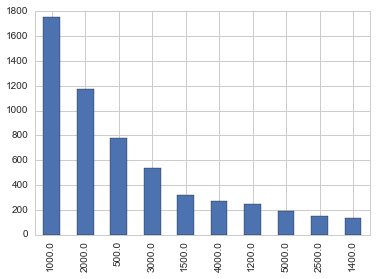

In [17]:
df['value'].groupby([df['show_number'],df['round']]).max().value_counts().head(10).plot(kind='bar')

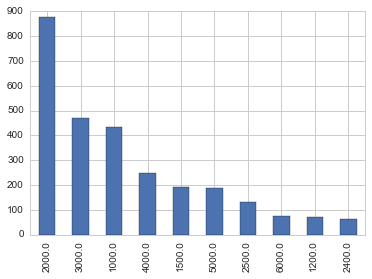

In [18]:
df['value'].groupby(df['show_number']).max().value_counts().head(10).plot(kind='bar')

In [19]:
# maximum number of categories per show and round
df['category'].groupby([df['show_number'],df['round']]).nunique().unstack().sort_values(['Jeopardy!'], ascending=True).head(10)

round,Double Jeopardy!,Final Jeopardy!,Jeopardy!,Tiebreaker
show_number,,,,
3043,5,1,4,NaN
3022,NaN,NaN,4,NaN
1178,NaN,NaN,4,NaN
5098,5,1,4,NaN
1,5,1,5,NaN
3790,6,1,5,NaN
4543,6,1,5,NaN
2809,6,1,5,NaN
1106,6,1,5,NaN


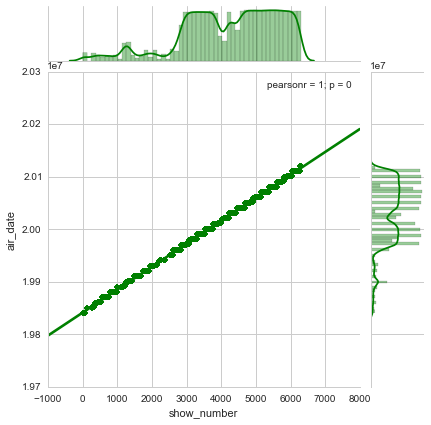

In [20]:
# Is there a 1-1 correpondence between show number an dairdate? -Ans Yes
sns.jointplot(x="show_number", y="air_date", data=df, kind = "reg",color='g');